### Motivation:
Vitmain D is one of the most prevalent yet underappreciated deficiency in adults especially with more people spending time  indoors. The project specificaally looks is there any statistically significant relationship between vitamin D and serum Alkaline phosphatase
#### references:
1) Bellastella G, Scappaticcio L, Longo M, Carotenuto R, Carbone C, Caruso P, Maio A, Paglionico VA, Vietri MT, Maiorino MI, Esposito K. New insights into vitamin D regulation: is there a role for alkaline phosphatase? J Endocrinol Invest. 2021 Sep;44(9):1891-1896. doi: 10.1007/s40618-021-01503-w. Epub 2021 Jan 25. PMID: 33492600; PMCID: PMC8357672.

In [1]:
import xport
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import weightstats as stests
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [3]:
file_loc = '../nhanes_data_files/'

df_demog_E = pd.read_sas(file_loc + 'DEMO_E_2007_2008.xpt')
df_demog_F = pd.read_sas(file_loc + 'DEMO_F_2009_2010.xpt')
df_demog_G = pd.read_sas(file_loc + 'DEMO_G_2011_2012.xpt')
df_demog_H = pd.read_sas(file_loc + 'DEMO_H_2013_2014.xpt')
df_demog_I = pd.read_sas(file_loc + 'DEMO_I_2015_2016.xpt')

df_BIOPRO_E = pd.read_sas(file_loc +'BIOPRO_E_2007_2008.xpt')
df_VID_E = pd.read_sas(file_loc +'VID_E_2007_2008.xpt')

df_BIOPRO_F = pd.read_sas(file_loc +'BIOPRO_F_2009_2010.xpt')
df_VID_F = pd.read_sas(file_loc +'VID_F_2009_2010.xpt')

df_BIOPRO_G = pd.read_sas(file_loc +'BIOPRO_G_2011_2012.xpt')
df_VID_G = pd.read_sas(file_loc +'VID_G_2011_2012.xpt')

df_BIOPRO_H = pd.read_sas(file_loc +'BIOPRO_H_2013_2014.xpt')
df_VID_H = pd.read_sas(file_loc +'VID_H_2013_2014.xpt')

df_BIOPRO_I = pd.read_sas(file_loc +'BIOPRO_I_2015_2016.xpt')
df_VID_I = pd.read_sas(file_loc +'VID_I_2015_2016.xpt')

In [4]:
df_ALP_E=df_BIOPRO_E[['SEQN','LBXSAPSI']].copy()
df_ALP_F=df_BIOPRO_F[['SEQN','LBXSAPSI']].copy()
df_ALP_G=df_BIOPRO_G[['SEQN','LBXSAPSI']].copy()
df_ALP_H=df_BIOPRO_H[['SEQN','LBXSAPSI']].copy()
df_ALP_I=df_BIOPRO_I[['SEQN','LBXSAPSI']].copy()
df_ALP_E.head()

,SEQN,LBXSAPSI
0,41475.0,113.0
1,41477.0,44.0
2,41479.0,78.0
3,41481.0,NaN
4,41482.0,85.0


In [5]:
df_VID_E.head()

,SEQN,LBXVIDMS,LBDVIDLC,LBXVD2MS,LBDVD2LC,LBXVD3MS,LBDVD3LC,LBXVE3MS,LBDVE3LC
0,41475.0,58.8,5.397605e-79,1.45,1.0,57.3,5.397605e-79,4.17,5.397605e-79
1,41476.0,80.9,5.397605e-79,1.45,1.0,79.4,5.397605e-79,5.52,5.397605e-79
2,41477.0,81.8,5.397605e-79,1.45,1.0,80.3,5.397605e-79,2.42,5.397605e-79
3,41478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41479.0,78.4,5.397605e-79,1.45,1.0,76.9,5.397605e-79,3.07,5.397605e-79


In [6]:
df_VID_SALP_E =df_demog_E[['SEQN','RIDAGEYR']].merge( df_VID_E[['SEQN','LBXVIDMS']]).merge(df_ALP_E)
df_VID_SALP_E=df_VID_SALP_E[df_VID_SALP_E['RIDAGEYR']>20].copy()
df_VID_SALP_E['loge_LBXSAPSI']=np.log(df_VID_SALP_E['LBXSAPSI'])
# df_VID_SALP_E['loge_LBXVIDMS']=np.log(df_VID_SALP_E['LBXVIDMS'])

df_VID_SALP_F = df_demog_F[['SEQN','RIDAGEYR']].merge(df_VID_F[['SEQN','LBXVIDMS']]).merge(df_ALP_F)
df_VID_SALP_F=df_VID_SALP_F[df_VID_SALP_F['RIDAGEYR']>20].copy()

df_VID_SALP_F['loge_LBXSAPSI']=np.log(df_VID_SALP_F['LBXSAPSI'])

df_VID_SALP_G = df_demog_G[['SEQN','RIDAGEYR']].merge(df_VID_G[['SEQN','LBXVIDMS']]).merge(df_ALP_G)
df_VID_SALP_G=df_VID_SALP_G[df_VID_SALP_G['RIDAGEYR']>20].copy()

df_VID_SALP_G['loge_LBXSAPSI']=np.log(df_VID_SALP_G['LBXSAPSI'])

df_VID_SALP_H = df_demog_H[['SEQN','RIDAGEYR']].merge(df_VID_H[['SEQN','LBXVIDMS']]).merge(df_ALP_H)
df_VID_SALP_H=df_VID_SALP_H[df_VID_SALP_H['RIDAGEYR']>20].copy()

df_VID_SALP_H['loge_LBXSAPSI']=np.log(df_VID_SALP_H['LBXSAPSI'])

df_VID_SALP_I = df_demog_I[['SEQN','RIDAGEYR']].merge(df_VID_I[['SEQN','LBXVIDMS']]).merge(df_ALP_I)
df_VID_SALP_I=df_VID_SALP_I[df_VID_SALP_I['RIDAGEYR']>20].copy()

df_VID_SALP_I['loge_LBXSAPSI']=np.log(df_VID_SALP_I['LBXSAPSI'])
df_VID_SALP_E.head()

,SEQN,RIDAGEYR,LBXVIDMS,LBXSAPSI,loge_LBXSAPSI
0,41475.0,62.0,58.8,113.0,4.727388
1,41477.0,71.0,81.8,44.0,3.784190
2,41479.0,52.0,78.4,78.0,4.356709
3,41481.0,21.0,NaN,NaN,NaN
4,41482.0,64.0,61.9,85.0,4.442651


In [7]:
df_VID_SALP_E[['LBXVIDMS','LBXSAPSI','loge_LBXSAPSI']].dropna().describe()

,LBXVIDMS,LBXSAPSI,loge_LBXSAPSI
count,4534.000000,4534.000000,4534.000000
mean,61.401806,70.669166,4.208428
std,24.858852,24.975372,0.309142
min,5.410000,15.000000,2.708050
25%,43.100000,55.000000,4.007333
50%,60.200000,67.000000,4.204693
75%,76.875000,82.000000,4.406719
max,213.000000,626.000000,6.439350


In [8]:
df_VID_SALP_E[['LBXVIDMS','LBXSAPSI','loge_LBXSAPSI']].dropna().corr()

,LBXVIDMS,LBXSAPSI,loge_LBXSAPSI
LBXVIDMS,1.000000,-0.126035,-0.135331
LBXSAPSI,-0.126035,1.000000,0.933311
loge_LBXSAPSI,-0.135331,0.933311,1.000000


In [9]:
df_VID_SALP_F[['LBXVIDMS','LBXSAPSI','loge_LBXSAPSI']].dropna().describe()

,LBXVIDMS,LBXSAPSI,loge_LBXSAPSI
count,5574.000000,5574.000000,5574.000000
mean,63.571624,69.761033,4.195432
std,26.043048,24.132573,0.311027
min,7.430000,10.000000,2.302585
25%,44.700000,54.000000,3.988984
50%,61.400000,66.000000,4.189655
75%,79.300000,81.000000,4.394449
max,262.000000,633.000000,6.450470


In [10]:
df_VID_SALP_F[['LBXVIDMS','LBXSAPSI','loge_LBXSAPSI']].dropna().corr()

,LBXVIDMS,LBXSAPSI,loge_LBXSAPSI
LBXVIDMS,1.000000,-0.106372,-0.123762
LBXSAPSI,-0.106372,1.000000,0.941858
loge_LBXSAPSI,-0.123762,0.941858,1.000000


In [11]:
df_VID_SALP_G[['LBXVIDMS','LBXSAPSI','loge_LBXSAPSI']].dropna().describe()

,LBXVIDMS,LBXSAPSI,loge_LBXSAPSI
count,4787.000000,4787.000000,4787.000000
mean,64.705482,67.809275,4.165930
std,28.792471,24.607240,0.312858
min,8.320000,7.000000,1.945910
25%,43.900000,53.000000,3.970292
50%,61.400000,64.000000,4.158883
75%,80.800000,78.000000,4.356709
max,375.000000,729.000000,6.591674


In [12]:
df_VID_SALP_G[['LBXVIDMS','LBXSAPSI','loge_LBXSAPSI']].dropna().corr()

,LBXVIDMS,LBXSAPSI,loge_LBXSAPSI
LBXVIDMS,1.000000,-0.061443,-0.066158
LBXSAPSI,-0.061443,1.000000,0.921705
loge_LBXSAPSI,-0.066158,0.921705,1.000000


In [13]:
df_VID_SALP_H[['LBXVIDMS','LBXSAPSI','loge_LBXSAPSI']].dropna().describe()

,LBXVIDMS,LBXSAPSI,loge_LBXSAPSI
count,5230.000000,5230.000000,5230.000000
mean,65.888178,66.750669,4.148333
std,28.517465,26.321398,0.314332
min,9.370000,9.000000,2.197225
25%,46.125000,52.000000,3.951244
50%,63.000000,63.000000,4.143135
75%,81.500000,77.000000,4.343805
max,318.000000,907.000000,6.810142


In [14]:
df_VID_SALP_H[['LBXVIDMS','LBXSAPSI','loge_LBXSAPSI']].dropna().corr()

,LBXVIDMS,LBXSAPSI,loge_LBXSAPSI
LBXVIDMS,1.000000,-0.056290,-0.072727
LBXSAPSI,-0.056290,1.000000,0.891456
loge_LBXSAPSI,-0.072727,0.891456,1.000000


In [15]:
df_VID_SALP_I[['LBXVIDMS','LBXSAPSI','loge_LBXSAPSI']].dropna().describe()

,LBXVIDMS,LBXSAPSI,loge_LBXSAPSI
count,5076.000000,5076.000000,5076.000000
mean,65.372898,69.832939,4.198262
std,28.743187,23.681775,0.303628
min,7.040000,23.000000,3.135494
25%,44.600000,54.000000,3.988984
50%,61.750000,66.000000,4.189655
75%,80.400000,81.000000,4.394449
max,253.000000,384.000000,5.950643


In [16]:
df_VID_SALP_I[['LBXVIDMS','LBXSAPSI','loge_LBXSAPSI']].dropna().corr()

,LBXVIDMS,LBXSAPSI,loge_LBXSAPSI
LBXVIDMS,1.000000,-0.090762,-0.091647
LBXSAPSI,-0.090762,1.000000,0.952316
loge_LBXSAPSI,-0.091647,0.952316,1.000000


In [17]:
df_VID_SALP=pd.concat([df_VID_SALP_E,df_VID_SALP_F,df_VID_SALP_G,df_VID_SALP_H,df_VID_SALP_I])
df_VID_SALP.dropna().describe()

,SEQN,RIDAGEYR,LBXVIDMS,LBXSAPSI,loge_LBXSAPSI
count,25201.000000,25201.000000,25201.000000,25201.000000,25201.000000
mean,67884.708861,50.033888,64.240195,68.943415,4.182962
std,15113.075578,17.407045,27.498004,24.794901,0.311037
min,41475.000000,21.000000,5.410000,7.000000,1.945910
25%,54990.000000,35.000000,44.500000,54.000000,3.988984
50%,67298.000000,50.000000,61.500000,65.000000,4.174387
75%,81290.000000,64.000000,79.700000,80.000000,4.382027
max,93702.000000,80.000000,375.000000,907.000000,6.810142


In [18]:
df_VID_SALP[['LBXVIDMS','LBXSAPSI','loge_LBXSAPSI']].dropna().corr()

,LBXVIDMS,LBXSAPSI,loge_LBXSAPSI
LBXVIDMS,1.000000,-0.087982,-0.098565
LBXSAPSI,-0.087982,1.000000,0.926991
loge_LBXSAPSI,-0.098565,0.926991,1.000000


array([[<AxesSubplot:title={'center':'LBXVIDMS'}>]], dtype=object)

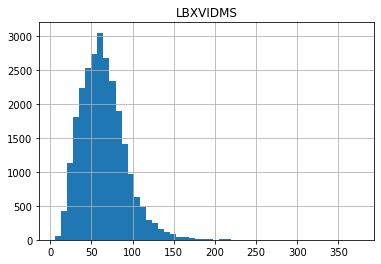

In [19]:
df_VID_SALP[['LBXVIDMS']].hist(bins=50)

<AxesSubplot:>

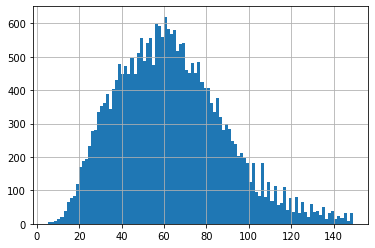

In [20]:
df_VID_SALP[df_VID_SALP['LBXVIDMS']<150]['LBXVIDMS'].hist(bins=100)

array([[<AxesSubplot:title={'center':'LBXSAPSI'}>]], dtype=object)

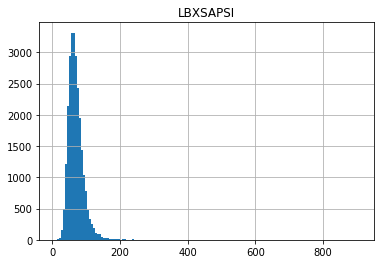

In [21]:
df_VID_SALP[['LBXSAPSI']].hist(bins=150)

<AxesSubplot:>

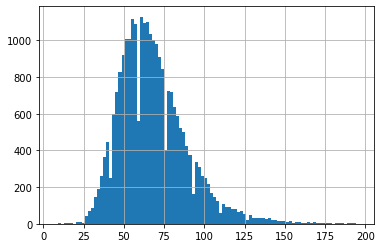

In [22]:
df_VID_SALP[df_VID_SALP['LBXSAPSI']<200]['LBXSAPSI'].hist(bins=100)

array([[<AxesSubplot:title={'center':'loge_LBXSAPSI'}>]], dtype=object)

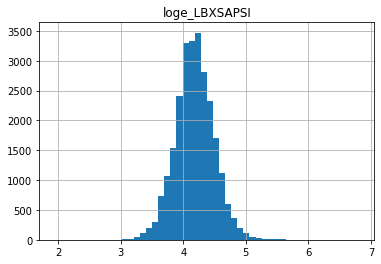

In [23]:
df_VID_SALP[['loge_LBXSAPSI']].hist(bins=50)

In [24]:
model = smf.ols(formula="loge_LBXSAPSI ~ LBXVIDMS", data=df_VID_SALP).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          loge_LBXSAPSI   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     247.2
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.93e-55
Time:                        07:47:02   Log-Likelihood:                -6204.4
No. Observations:               25201   AIC:                         1.241e+04
Df Residuals:                   25199   BIC:                         1.243e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2546      0.005    858.653      0.0

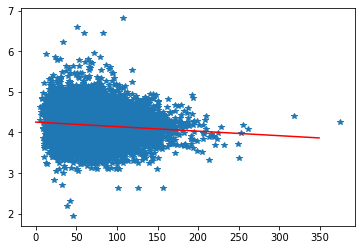

In [25]:
x=[i for i in range(0,350)]

y=[model.params[0]+i*model.params[1] for i in x]

plt.plot(df_VID_SALP['LBXVIDMS'],df_VID_SALP['loge_LBXSAPSI'],'*')
plt.plot(x,y,'r')

In [26]:
# df_merge_paq_dbq[['LBXVIDMS','LBXSAPSI']].groupby(df_merge_paq_dbq['LBXVIDMS']).mean().plot(marker='*',x='DBQ700',y='DXDTRPF')

<AxesSubplot:xlabel='LBXVIDMS'>

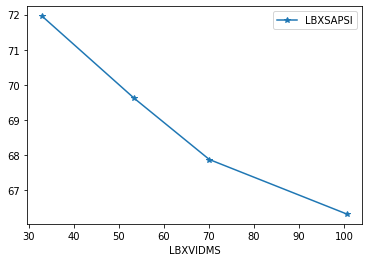

In [27]:
df_VID_SALP[['LBXVIDMS','LBXSAPSI']].groupby(pd.cut(df_VID_SALP['LBXVIDMS'], [df_VID_SALP['LBXVIDMS'].min(),df_VID_SALP['LBXVIDMS'].describe()['25%'], df_VID_SALP['LBXVIDMS'].describe()['50%'],df_VID_SALP['LBXVIDMS'].describe()['75%'],df_VID_SALP['LBXVIDMS'].max()])).mean().plot(marker='*',x='LBXVIDMS',y='LBXSAPSI')

<AxesSubplot:xlabel='LBXVIDMS'>

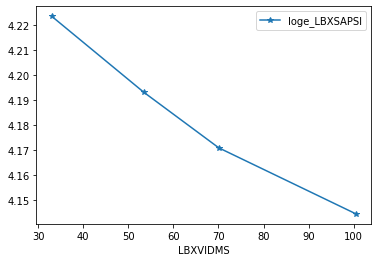

In [28]:
df_VID_SALP[['LBXVIDMS','loge_LBXSAPSI']].groupby(pd.cut(df_VID_SALP['LBXVIDMS'], [df_VID_SALP['LBXVIDMS'].min(),df_VID_SALP['LBXVIDMS'].describe()['25%'], df_VID_SALP['LBXVIDMS'].describe()['50%'],df_VID_SALP['LBXVIDMS'].describe()['75%'],df_VID_SALP['LBXVIDMS'].max()])).mean().plot(marker='*',x='LBXVIDMS',y='loge_LBXSAPSI')

In [29]:
# 100*(32016-30180)/(32016)

In [30]:
train_test_split?

In [31]:
dataset_ai=df_VID_SALP[['LBXVIDMS','loge_LBXSAPSI']].dropna()
X = dataset_ai[['LBXVIDMS']]
y = dataset_ai['loge_LBXSAPSI']
train_X, val_X, train_y, val_y = train_test_split(X, y,test_size=0.2, random_state=1)

In [32]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def make_standard_normal(df_train, df_test):
    """
    In order to make the data closer to a normal distribution, take log
    transforms to reduce the skew.
    Then standardize the distribution with a mean of zero and standard deviation of 1. 
  
    Args:
      df_train (dataframe): unnormalized training data.
      df_test (dataframe): unnormalized test data.
  
    Returns:
      df_train_normalized (dateframe): normalized training data.
      df_test_normalized (dataframe): normalized test data.
    """
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###  
    # Remove skew by applying the log function to the train set, and to the test set
    df_train_unskewed = np.log(df_train)
    df_test_unskewed = np.log(df_test)
    
    #calculate the mean and standard deviation of the training set
    mean = np.mean(df_train_unskewed,axis=0)
    stdev = df_train_unskewed.std(axis=0,ddof=1)
#     stdev = np.std(df_train_unskewed,axis=0,ddof=1)
    
    # standardize the training set
    df_train_standardized = (df_train_unskewed-mean)/stdev
    
    # standardize the test set (see instructions and hints above)
    df_test_standardized = (df_test_unskewed-mean)/stdev
    
    ### END CODE HERE ###
    return df_train_standardized, df_test_standardized

In [33]:
X_train, X_test = make_standard_normal(train_X, val_X)

array([[<AxesSubplot:title={'center':'LBXVIDMS'}>]], dtype=object)

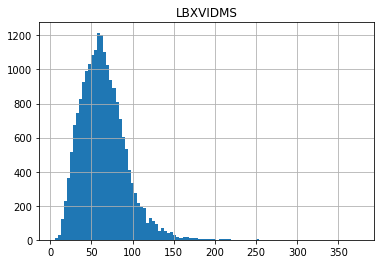

In [34]:
train_X.hist(bins=100)

array([[<AxesSubplot:title={'center':'LBXVIDMS'}>]], dtype=object)

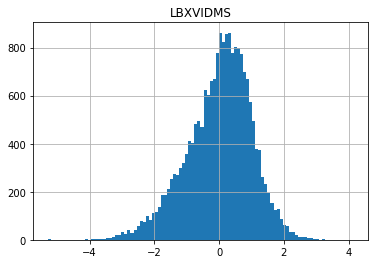

In [35]:
X_train.hist(bins=100)

In [36]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
my_model =regressor.fit(train_X, train_y)

In [37]:
y_pred = my_model.predict(val_X)

In [39]:
from sklearn.metrics import r2_score
rsquare = r2_score(val_y, y_pred) #can be negative as the AI model are not linear regressors 
rsquare

-0.0339448778437077

## Inference: 
#### There is small but statistically significant negative correlation between vit D and serum ALP. However the AI model couldn't predict weak correlation. 